In [ ]:
import os
import pandas as pd
from fbprophet import Prophet

import warnings; 
warnings.simplefilter('ignore')

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
!git clone https://github.com/farelarden/Dicoding-Capstone-ML.git

fatal: destination path 'Dicoding-Capstone-ML' already exists and is not an empty directory.


In [ ]:
df_Makanan = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Makanan.csv')
df_Minuman = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 02 - Minuman.csv')
df_Rumah = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 03 - Rumah.csv')
df_Sandang = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 04 - Sandang.csv')
df_Transportasi = pd.read_csv('/content/Dicoding-Capstone-ML/Dataset/Fix Dataset/fix 07 - Transportasi.csv')

In [ ]:
df_Makanan.head()
df_Makanan= df_Makanan.drop(['URUTAN'], axis=1)

In [ ]:
df_Makanan.head()

,Unnamed: 0,BULAN,KOTA MEULABOH,KOTA BANDA ACEH,KOTA LHOKSEUMAWE,KOTA SIBOLGA,KOTA PEMATANG SIANTAR,KOTA MEDAN,KOTA PADANGSIDIMPUAN,KOTA PADANG,KOTA BUKITTINGGI,TEMBILAHAN,KOTA PEKANBARU,KOTA DUMAI,BUNGO,KOTA JAMBI,KOTA PALEMBANG,KOTA LUBUKLINGGAU,KOTA BENGKULU,KOTA BANDAR LAMPUNG,KOTA METRO,TANJUNG PANDAN,KOTA PANGKAL PINANG,KOTA BATAM,KOTA TANJUNG PINANG,DKI JAKARTA,KOTA BOGOR,KOTA SUKABUMI,KOTA BANDUNG,KOTA CIREBON,KOTA BEKASI,KOTA DEPOK,KOTA TASIKMALAYA,CILACAP,PURWOKERTO,KUDUS,KOTA SURAKARTA,KOTA SEMARANG,KOTA TEGAL,KOTA YOGYAKARTA,...,KOTA MALANG,KOTA PROBOLINGGO,KOTA MADIUN,KOTA SURABAYA,KOTA TANGERANG,KOTA CILEGON,KOTA SERANG,SINGARAJA,KOTA DENPASAR,KOTA MATARAM,KOTA BIMA,MAUMERE,KOTA KUPANG,KOTA PONTIANAK,KOTA SINGKAWANG,SAMPIT,KOTA PALANGKA RAYA,TANJUNG,KOTA BANJARMASIN,KOTA BALIKPAPAN,KOTA SAMARINDA,KOTA TARAKAN,KOTA MANADO,KOTA PALU,BULUKUMBA,WATAMPONE,KOTA MAKASSAR,KOTA PARE-PARE,KOTA PALOPO,KOTA KENDARI,KOTA BAU-BAU,KOTA GORONTALO,MAMUJU,KOTA AMBON,KOTA TUAL,KOTA TERNATE,MANOKWARI,KOTA SORONG,MERAUKE,KOTA JAYAPURA
0,0,2014-01-01,1.10,0.25,0.31,0.20,0.12,0.39,1.53,0.25,0.12,0.0,1.34,0.66,0.68,0.34,0.37,0.04,0.56,0.37,-0.06,0.00,2.65,0.03,1.08,0.66,0.73,3.43,1.31,0.00,1.58,0.14,0.17,0.00,1.16,0.54,0.85,0.44,0.91,0.04,...,0.36,0.06,1.29,1.54,1.07,0.45,0.57,1.47,1.17,0.01,7.81,0.20,0.08,0.64,0.18,2.49,2.01,0.00,0.20,1.09,0.24,0.95,0.51,0.01,0.33,0.33,2.39,2.33,0.67,0.11,0.65,0.70,0.06,0.00,1.33,0.00,0.30,2.26,1.89,0.76
1,1,2014-02-01,0.88,0.00,0.00,0.29,0.79,0.22,0.17,0.11,0.63,0.0,1.02,0.80,0.93,0.36,0.00,0.00,0.00,0.26,0.00,0.00,0.02,0.00,0.18,0.01,0.36,0.37,-0.06,0.27,0.09,0.03,0.09,0.58,0.04,1.67,0.52,0.14,1.58,0.38,...,3.19,0.77,0.09,0.25,0.31,1.15,1.15,0.00,0.87,1.10,0.06,0.43,1.05,0.06,2.37,0.27,2.12,1.31,2.68,0.01,1.02,0.12,0.97,1.99,0.19,1.00,-0.05,0.49,0.08,0.35,0.61,3.72,0.00,0.00,1.76,1.05,1.21,0.80,0.26,0.38
2,2,2014-03-01,1.42,0.10,0.73,0.29,0.16,0.22,0.00,0.01,0.00,0.0,0.66,0.02,0.00,0.97,0.31,0.00,0.01,0.06,0.00,1.02,-0.01,0.05,0.69,0.46,0.02,0.52,0.03,0.15,0.33,0.08,0.46,0.04,0.07,0.00,0.31,0.57,0.15,0.15,...,0.27,1.25,-0.05,0.64,1.21,0.34,1.98,1.66,0.09,0.00,1.69,0.28,0.02,0.00,0.02,2.09,0.00,0.97,0.05,-0.01,0.17,0.28,0.44,1.59,0.10,0.55,1.12,0.02,0.10,2.53,0.00,0.00,0.41,0.00,0.00,0.05,0.53,0.00,0.24,0.39
3,3,2014-04-01,0.17,0.04,1.26,0.12,0.67,1.31,0.93,0.36,0.18,0.0,0.23,0.11,0.17,0.36,0.07,0.00,0.76,0.00,-0.01,0.00,0.00,0.09,0.03,0.04,0.12,0.43,0.71,0.00,0.38,0.18,0.41,0.43,0.17,0.89,0.10,0.06,0.32,0.16,...,0.05,-0.01,0.42,1.37,1.06,0.14,0.00,3.20,0.40,0.09,0.00,0.04,0.05,-0.04,0.03,1.42,0.20,0.83,0.02,0.10,0.36,0.01,1.16,0.02,0.15,0.41,1.18,0.25,0.00,0.10,0.07,0.26,0.04,1.81,0.20,0.00,2.59,0.00,0.81,0.41
4,4,2014-05-01,-0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.40,0.0,0.04,0.00,0.00,0.17,0.00,2.58,0.00,0.00,0.06,0.00,0.02,1.20,0.22,0.17,0.20,0.54,0.61,-0.06,0.48,0.01,0.12,0.91,0.00,0.26,0.02,0.18,0.00,0.02,...,0.93,0.24,0.17,0.09,0.19,0.00,0.45,1.85,0.73,1.28,0.46,0.00,0.10,0.31,0.45,0.19,0.00,0.52,0.00,0.09,1.08,0.04,0.81,0.00,0.75,0.42,0.27,1.07,1.03,1.26,0.68,0.00,0.04,0.46,0.00,0.15,0.62,0.00,0.07,0.27


In [ ]:
df_Makanan.dtypes

Unnamed: 0            int64
BULAN                object
KOTA MEULABOH       float64
KOTA BANDA ACEH     float64
KOTA LHOKSEUMAWE    float64
                     ...   
KOTA TERNATE        float64
MANOKWARI           float64
KOTA SORONG         float64
MERAUKE             float64
KOTA JAYAPURA       float64
Length: 84, dtype: object

In [ ]:
df_Makanan = df_Makanan[['KOTA MEULABOH','BULAN']]
df_Makanan.columns = ['y', 'ds']

In [ ]:
df_Makanan.head()

,y,ds
0,1.10,2014-01-01
1,0.88,2014-02-01
2,1.42,2014-03-01
3,0.17,2014-04-01
4,-0.01,2014-05-01


In [ ]:
df_Makanan.at[0,'y']

1.1

In [ ]:
df_Makanan.dtypes

y     float64
ds     object
dtype: object

In [ ]:
df_Makanan.ds = pd.to_datetime(df_Makanan.ds)

In [ ]:
df_Makanan.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [ ]:
df_Makanan.head()

,y,ds
0,1.10,2014-01-01
1,0.88,2014-02-01
2,1.42,2014-03-01
3,0.17,2014-04-01
4,-0.01,2014-05-01


In [ ]:
df_Makanan.shape

(94, 2)

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_Makanan)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=100,freq='M')

In [ ]:
future

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
189,2029-09-30
190,2029-10-31
191,2029-11-30
192,2029-12-31


In [ ]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,0.040272,-0.310830,2.736625,0.040272,0.040272,1.113158,1.113158,1.113158,0.688504,0.688504,0.688504,0.424654,0.424654,0.424654,0.0,0.0,0.0,1.153430
1,2014-02-01,0.038336,-1.852841,1.345730,0.038336,0.038336,-0.237101,-0.237101,-0.237101,0.688504,0.688504,0.688504,-0.925605,-0.925605,-0.925605,0.0,0.0,0.0,-0.198765
2,2014-03-01,0.036586,-1.460712,1.822696,0.036586,0.036586,0.088726,0.088726,0.088726,0.688504,0.688504,0.688504,-0.599778,-0.599778,-0.599778,0.0,0.0,0.0,0.125312
3,2014-04-01,0.034650,-1.414092,1.729186,0.034650,0.034650,0.092865,0.092865,0.092865,0.688504,0.688504,0.688504,-0.595639,-0.595639,-0.595639,0.0,0.0,0.0,0.127515
4,2014-05-01,0.032776,-1.208672,1.970933,0.032776,0.032776,0.281094,0.281094,0.281094,0.688504,0.688504,0.688504,-0.407410,-0.407410,-0.407410,0.0,0.0,0.0,0.313870


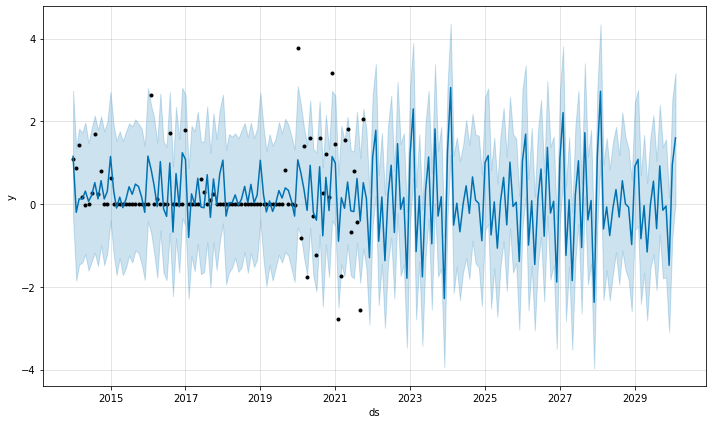

In [ ]:
plot1 = m.plot(forecast)

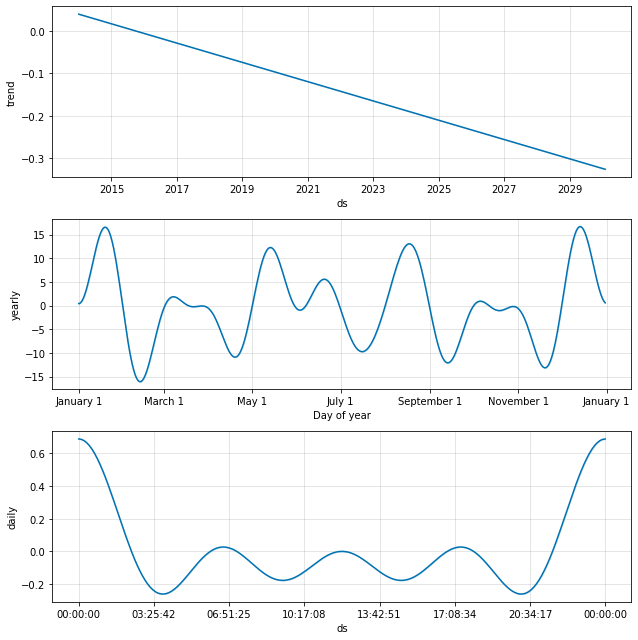

In [ ]:
plt2 = m.plot_components(forecast)

In [ ]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
daily                                float64
daily_lower                          float64
daily_upper                          float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [ ]:
forecast_value = forecast.loc[forecast.ds == '2014-01-01',['yhat']].values[0]

In [ ]:
forecast_value

array([1.15342977])

In [ ]:
# df_Makanan.head()
df_Makanan.loc[df_Makanan.ds == '2014-01-01',['y']].values[0]

array([1.1])

In [ ]:
df_Makanan.head()

,y,ds
0,1.10,2014-01-01
1,0.88,2014-02-01
2,1.42,2014-03-01
3,0.17,2014-04-01
4,-0.01,2014-05-01


In [ ]:
mask = (forecast['ds'] > '2021-10-31') & (forecast['ds'] <= '2021-12-31')
forecast_mask = forecast.loc[mask]

In [ ]:
forecast_mask

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2021-11-30,-0.140253,-2.912199,0.279134,-0.140253,-0.140253,-1.154665,-1.154665,-1.154665,0.688504,0.688504,0.688504,-1.843169,-1.843169,-1.843169,0.0,0.0,0.0,-1.294918
96,2021-12-31,-0.142190,-0.527176,2.614221,-0.142190,-0.142190,1.276710,1.276710,1.276710,0.688504,0.688504,0.688504,0.588206,0.588206,0.588206,0.0,0.0,0.0,1.134520


In [ ]:
inflation_average_rate = (forecast_mask['yhat'].sum())/forecast_mask.shape[0]
inflation_average_rate

-0.0801988404420867

In [ ]:
from datetime import date
from datetime import datetime

In [ ]:
end_date="2019-01-01"

In [ ]:
end_date = pd.to_datetime(end_date)

In [ ]:
print(end_date)

2019-01-01 00:00:00


In [ ]:
print(type(end_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
start_date = date.today()

In [ ]:
start_date = pd.to_datetime(start_date)

In [ ]:
mask = (forecast['ds'] > end_date) & (forecast['ds'] <= start_date)
forecast_mask = forecast.loc[mask]

In [ ]:
forecast_mask

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
61,2019-02-01,-0.075726,-1.334117,1.862452,-0.075726,-0.075726,0.303110,0.303110,0.303110,0.688504,0.688504,0.688504,-0.385394,-0.385394,-0.385394,0.0,0.0,0.0,0.227384
62,2019-03-01,-0.077475,-1.981759,1.283685,-0.077475,-0.077475,-0.110087,-0.110087,-0.110087,0.688504,0.688504,0.688504,-0.798591,-0.798591,-0.798591,0.0,0.0,0.0,-0.187562
63,2019-04-01,-0.079412,-1.472917,1.691590,-0.079412,-0.079412,0.156622,0.156622,0.156622,0.688504,0.688504,0.688504,-0.531882,-0.531882,-0.531882,0.0,0.0,0.0,0.077210
64,2019-05-01,-0.081286,-1.848642,1.406065,-0.081286,-0.081286,-0.096778,-0.096778,-0.096778,0.688504,0.688504,0.688504,-0.785283,-0.785283,-0.785283,0.0,0.0,0.0,-0.178064
65,2019-06-01,-0.083222,-1.521406,1.601019,-0.083222,-0.083222,0.111188,0.111188,0.111188,0.688504,0.688504,0.688504,-0.577317,-0.577317,-0.577317,0.0,0.0,0.0,0.027965
66,2019-07-01,-0.085096,-1.224724,1.980041,-0.085096,-0.085096,0.412618,0.412618,0.412618,0.688504,0.688504,0.688504,-0.275886,-0.275886,-0.275886,0.0,0.0,0.0,0.327522
67,2019-08-01,-0.087033,-1.411368,1.704322,-0.087033,-0.087033,0.233461,0.233461,0.233461,0.688504,0.688504,0.688504,-0.455044,-0.455044,-0.455044,0.0,0.0,0.0,0.146428
68,2019-09-01,-0.088969,-1.156559,2.063305,-0.088969,-0.088969,0.480776,0.480776,0.480776,0.688504,0.688504,0.688504,-0.207728,-0.207728,-0.207728,0.0,0.0,0.0,0.391807
69,2019-10-01,-0.090843,-1.245901,1.922140,-0.090843,-0.090843,0.425251,0.425251,0.425251,0.688504,0.688504,0.688504,-0.263253,-0.263253,-0.263253,0.0,0.0,0.0,0.334408
70,2019-11-01,-0.092779,-1.559738,1.633847,-0.092779,-0.092779,0.167007,0.167007,0.167007,0.688504,0.688504,0.688504,-0.521497,-0.521497,-0.521497,0.0,0.0,0.0,0.074228


In [ ]:
value = 100

In [ ]:
forecast_mask['value'] = value + forecast_mask['yhat']*value*0.01

In [ ]:
forecast_mask.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value
61,2019-02-01,-0.075726,-1.334117,1.862452,-0.075726,-0.075726,0.303110,0.303110,0.303110,0.688504,0.688504,0.688504,-0.385394,-0.385394,-0.385394,0.0,0.0,0.0,0.227384,100.227384
62,2019-03-01,-0.077475,-1.981759,1.283685,-0.077475,-0.077475,-0.110087,-0.110087,-0.110087,0.688504,0.688504,0.688504,-0.798591,-0.798591,-0.798591,0.0,0.0,0.0,-0.187562,99.812438
63,2019-04-01,-0.079412,-1.472917,1.691590,-0.079412,-0.079412,0.156622,0.156622,0.156622,0.688504,0.688504,0.688504,-0.531882,-0.531882,-0.531882,0.0,0.0,0.0,0.077210,100.077210
64,2019-05-01,-0.081286,-1.848642,1.406065,-0.081286,-0.081286,-0.096778,-0.096778,-0.096778,0.688504,0.688504,0.688504,-0.785283,-0.785283,-0.785283,0.0,0.0,0.0,-0.178064,99.821936
65,2019-06-01,-0.083222,-1.521406,1.601019,-0.083222,-0.083222,0.111188,0.111188,0.111188,0.688504,0.688504,0.688504,-0.577317,-0.577317,-0.577317,0.0,0.0,0.0,0.027965,100.027965


In [ ]:
forecast_mask.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
daily                                float64
daily_lower                          float64
daily_upper                          float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
value                                float64
dtype: object